In [119]:
import pandas as pd
import glob
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [120]:
DATA_PATH_RIGHT = 'data/right'
DATA_PATH_LEFT = 'data/left'
BAUD = 230400

In [121]:
def load_files(path):
    files = glob.glob(path + "/*.csv")
    dfs = []
    for f in files:
        dfs.append(pd.read_csv(f, index_col=None, header=0))

    df = pd.concat(dfs, axis=0, ignore_index=True)
    df.columns = ['timestamp','value']
    return df

In [122]:
df_left = load_files(DATA_PATH_LEFT)
print(df_left.head())
df_right = load_files(DATA_PATH_RIGHT)
print(df_right.head())

      timestamp    value
0  1.638311e+09  16350.0
1  1.638311e+09  16393.0
2  1.638311e+09  16416.0
3  1.638311e+09  16419.0
4  1.638311e+09  16409.0
      timestamp    value
0  1.638311e+09  16386.0
1  1.638311e+09  16351.0
2  1.638311e+09  16344.0
3  1.638311e+09  16335.0
4  1.638311e+09  16347.0


In [123]:
def get_second(d):
    return datetime.fromtimestamp(d).second

def preprocessing(df):
    df['timestamp'] = df['timestamp'].apply(get_second)
    df = df.groupby('timestamp').mean().reset_index()
    min_value = df['timestamp'].min()
    df['timestamp'] = df['timestamp'] - min_value
    return df

df_left = preprocessing(df_left)
df_right = preprocessing(df_right)

print(df_left.head())
print(df_right.head())

   timestamp         value
0          0  16400.765027
1          1  16389.153846
2          2  16388.173184
3          3  16384.110526
4          4  16390.997312
   timestamp         value
0          0  16386.777778
1          1  16397.237681
2          2  16403.539130
3          3  16383.966574
4          4  16387.623978


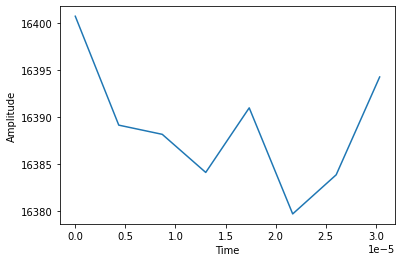

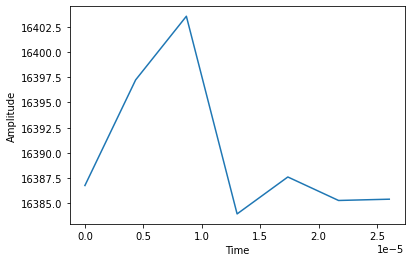

In [124]:
def plot_amplitude(df, plotname, rate):
  N = len(df['value'])
  L = N / rate
  f, ax = plt.subplots()
  ax.plot((np.arange(N) / rate), df['value'])
  ax.set_xlabel('Time')
  ax.set_ylabel('Amplitude');
  f.savefig(f'{plotname}_amplitude.png')   
  plt.show()
  plt.close(f)    

plot_amplitude(df_left, 'left', BAUD)
plot_amplitude(df_right, 'right', BAUD)

In [131]:
df_left['value'].min()

16379.6875

In [132]:
df_left['value'].max()

16400.765027322403